### This notebook I want to use to run tests:
- using a notebook might be uncommon and you can still run all tests just in a terminal aswell (hopefully)
- Reason for this is that I also want to implement some visual testing

In [1]:
import unittest
import importlib
import logging
logging.basicConfig(level=logging.CRITICAL, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger("divertor_spectroscopy")
logger.setLevel(logging.DEBUG)

test_fit_spectrum (divertor_spectroscopy.tests.test_analysis.Test_analysis)
Collection of tests for the fit_spectrum method ... 2024-08-21 19:24:28,044 - divertor_spectroscopy.instrument - WARNING - You have not given a width for your gaussian instrument function


2024-08-21 19:24:28,222 - divertor_spectroscopy.instrument - WARNING - You have not given a width for your gaussian instrument function


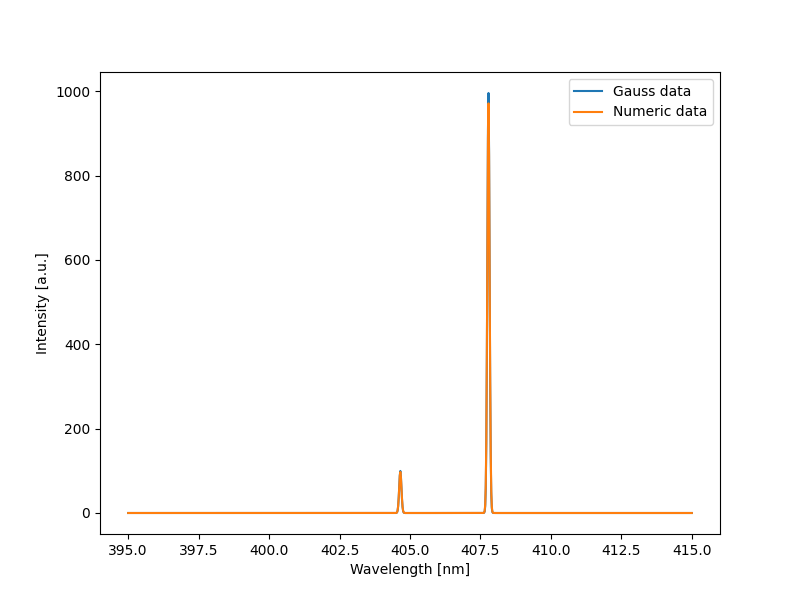

<unittest.runner.TextTestResult run=1 errors=0 failures=0>


ok

----------------------------------------------------------------------
Ran 1 test in 0.371s

OK


In [2]:
%matplotlib widget
from divertor_spectroscopy.tests import test_analysis
importlib.reload(test_analysis)

loader = unittest.TestLoader()
tests = loader.loadTestsFromTestCase(test_analysis.Test_analysis)
runner = unittest.TextTestRunner(verbosity=2)
result = runner.run(tests)
print(result)

test_gauss (divertor_spectroscopy.tests.test_utilities.Test_utilities)
testing gauss function ... 

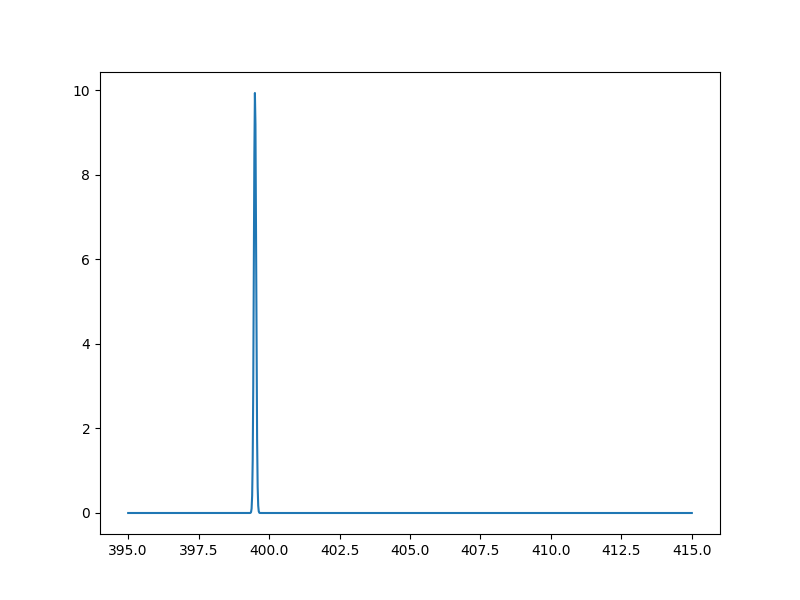

2024-08-21 19:24:28,733 - divertor_spectroscopy.tests.test_utilities - DEBUG - Comparison of intensity 1 with sum of spectrum 0.9990234374999416
ok
test_polinominal (divertor_spectroscopy.tests.test_utilities.Test_utilities) ... ok
test_val2idx (divertor_spectroscopy.tests.test_utilities.Test_utilities) ... 

<unittest.runner.TextTestResult run=3 errors=0 failures=0>


ok

----------------------------------------------------------------------
Ran 3 tests in 0.112s

OK


In [3]:
from divertor_spectroscopy.tests import test_utilities
importlib.reload(test_utilities)

loader = unittest.TestLoader()
tests = loader.loadTestsFromTestCase(test_utilities.Test_utilities)
runner = unittest.TextTestRunner(verbosity=2)
result = runner.run(tests)
print(result)

### Benchmarks

### Stark broadening code - compare my lomanowski routine with Nicolas

In [4]:
# Nicolas Routines provided via Email on the 19.04.2024
import numpy as np
import scipy
def get_freq_axis_conv(freq_axis, extra=1000):
    """
    extend a uniform frequency axis for use in convolution to avoid edge effects

    """

    min_freq, max_freq, = np.min(freq_axis), np.max(freq_axis)
    len_axis = len(freq_axis)
    dfreq = abs(freq_axis[1] - freq_axis[0])
    min_freq_conv = min_freq - extra / 2 * dfreq
    max_freq_conv = max_freq + extra / 2 * dfreq
    freq_axis_conv = np.linspace(min_freq_conv, max_freq_conv, len_axis + extra)

    return freq_axis_conv

def H_delta_spectrum(dens_vec,temp_vec, freqs, Te = 1 ):

                            from scipy.constants import e, k, c, atomic_mass, m_e
                            a_ij, b_ij, c_ij = [0.7149, 0.028, 3.954e-16]

                            freq_centre = c/ 410.174e-9
                            H_mass = 1.00794 * atomic_mass
                            v_th = np.sqrt(2  * temp_vec * e  / H_mass)

                            freqs_conv = get_freq_axis_conv(freqs)
                            plt.figure(figsize=(8,6))
                            plt.plot(freqs)
                            plt.plot(freqs_conv)
                            plt.show()

                            delta_lambda_12ij = c_ij * (dens_vec ** a_ij) / (Te ** b_ij)

                            ls_s = 1 / (abs((c/freqs.reshape(-1,1)  - c/freq_centre)* 1e9) ** (5. / 2.)  + (delta_lambda_12ij / 2) ** (5. / 2.))
                            ls_norm=  np.trapz(ls_s, freqs, axis = 0)
                            ls_s = np.divide(ls_s , ls_norm)

                            ls_d = (freq_centre ** -1) * np.sqrt((c / v_th) ** 2 / np.pi) * np.exp(- 0.5 * ((freqs_conv.reshape(-1,1)  - freq_centre)/ (v_th * freq_centre / (np.sqrt(2) * c))) ** 2)

                            ls_sd = scipy.signal.fftconvolve(ls_s, ls_d, 'same', axes = 0)

                            ls_sd_norm  = np.trapz(ls_sd, freqs, axis = 0)
                            ls_sd = np.divide(ls_sd , ls_sd_norm)

                            return ls_sd
def H_delta_lomanowski(dens_vec,temp_vec, freqs, Te = 1 ):

                            from scipy.constants import e, k, c, atomic_mass, m_e
                            a_ij, b_ij, c_ij = [0.7149, 0.028, 3.954e-16]

                            freq_centre = c/ 410.174e-9
                            H_mass = 1.00794 * atomic_mass
                            v_th = np.sqrt(2  * temp_vec * e  / H_mass)

                            freqs_conv = get_freq_axis_conv(freqs)

                            delta_lambda_12ij = c_ij * (dens_vec ** a_ij) / (Te ** b_ij)

                            ls_s = 1 / (abs((c/freqs.reshape(-1,1)  - c/freq_centre)* 1e9) ** (5. / 2.)  + (delta_lambda_12ij / 2) ** (5. / 2.))
                            ls_norm=  np.trapz(ls_s, freqs, axis = 0)
                            ls_s = np.divide(ls_s , ls_norm)

                            #ls_d = (freq_centre ** -1) * np.sqrt((c / v_th) ** 2 / np.pi) * np.exp(- 0.5 * ((freqs_conv.reshape(-1,1)  - freq_centre)/ (v_th * freq_centre / (np.sqrt(2) * c))) ** 2)

                            #ls_sd = scipy.signal.fftconvolve(ls_s, ls_d, 'same', axes = 0)

                            #ls_sd_norm  = np.trapz(ls_sd, freqs, axis = 0)
                            #ls_sd = np.divide(ls_sd , ls_sd_norm)

                            return ls_s
def H_delta_doppler(dens_vec,temp_vec, freqs, Te = 1 ):

                            from scipy.constants import e, k, c, atomic_mass, m_e
                            a_ij, b_ij, c_ij = [0.7149, 0.028, 3.954e-16]

                            freq_centre = c/ 410.174e-9
                            H_mass = 1.00794 * atomic_mass
                            v_th = np.sqrt(2  * temp_vec * e  / H_mass)

                            freqs_conv = get_freq_axis_conv(freqs)

                            #delta_lambda_12ij = c_ij * (dens_vec ** a_ij) / (Te ** b_ij)

                            #ls_s = 1 / (abs((c/freqs.reshape(-1,1)  - c/freq_centre)* 1e9) ** (5. / 2.)  + (delta_lambda_12ij / 2) ** (5. / 2.))
                            #ls_norm=  np.trapz(ls_s, freqs, axis = 0)
                            #ls_s = np.divide(ls_s , ls_norm)

                            ls_d = (freq_centre ** -1) * np.sqrt((c / v_th) ** 2 / np.pi) * np.exp(- 0.5 * ((freqs.reshape(-1,1)  - freq_centre)/ (v_th * freq_centre / (np.sqrt(2) * c))) ** 2)

                            #ls_sd = scipy.signal.fftconvolve(ls_s, ls_d, 'same', axes = 0)

                            #ls_sd_norm  = np.trapz(ls_sd, freqs, axis = 0)
                            #ls_sd = np.divide(ls_sd , ls_sd_norm)

                            return ls_d


### Comparison Lomanowskigauss

[7.49155262e+14 7.49118665e+14 7.49082070e+14 ... 7.13562378e+14
 7.13529175e+14 7.13495975e+14]


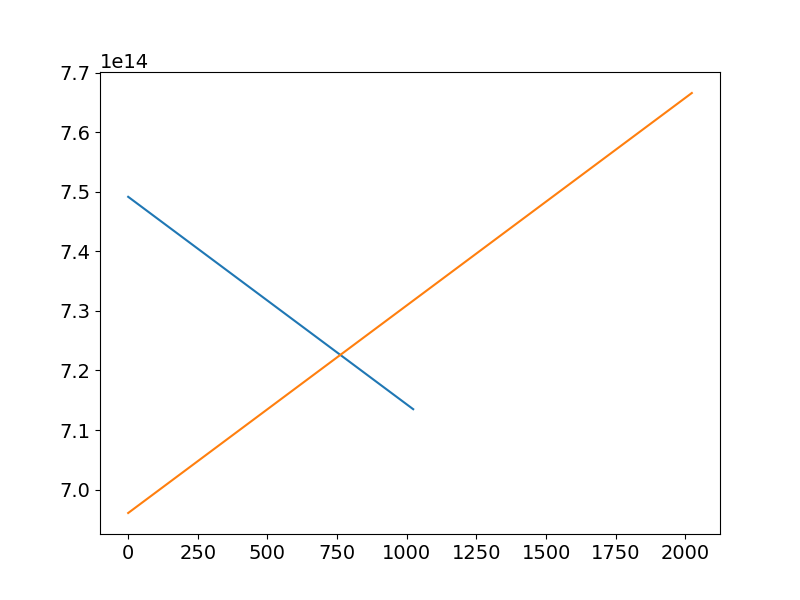

[-4.70225702e-06 -4.72474616e-06 -4.74738829e-06 ...  7.48527009e-17
 -3.25582689e-17 -3.64527341e-16]


In [5]:
import matplotlib.pyplot as plt
import scipy
from scipy.constants import c
from divertor_spectroscopy import utilities as utils
from divertor_spectroscopy import atomic_data
from divertor_spectroscopy import spectrum
from divertor_spectroscopy import instrument
from divertor_spectroscopy import analysis
plt.rcParams.update({'font.size': 14})
pixels = 1024
dens_vec = 5e19
temp_vec = 1
wavelength = np.linspace(410.174-10,410.174+10,pixels)
freqs = c/(wavelength*1e-9)
print(freqs)
freqs = np.linspace(freqs[0],freqs[-1],pixels)
spectrum_nicola =H_delta_spectrum(dens_vec=dens_vec,temp_vec=temp_vec,freqs=freqs,Te=1)[:,0]
spectrum_nicola = spectrum_nicola/np.trapz(wavelength,spectrum_nicola)
print(spectrum_nicola)

class Balmer_delta_fred(spectrum.Spectrum):
    def __init__(self):
        self.multiplets = []
        self.pec_lines = []
        self.balmer_lines = []
        self.all_tags = []
        self.recommended_background_position = 401.695
        self.strongest_line = 410.174
        self.add_balmer_lines_to_model(
                lines=["H_delta"], intensities=[1], electron_density=dens_vec,electron_temperature=temp_vec, doppler_temperature=temp_vec, tag="HI",magnetic_field=None,angle_to_magnetic_field=0)
        self.clear_tag_multiplicity()
model = Balmer_delta_fred()
doppler_width = utils.doppler_broadening_nist(T=temp_vec,m=1,lambda_0=410.174)
inst = instrument.Instrument(wavelength=wavelength,width=0)
analyse = analysis.Analysis(model=model,instrument=inst)
spectrum_fred = analyse.build_spectrum(wavelength,*analyse.default_fit_parameters)         
spectrum_gauss = utils.gauss(x=wavelength, offset=0, position=410.174, intensity=1, width=doppler_width)

plt.figure(figsize=(8,6))
shift = 0.01
plt.plot(wavelength-shift,np.abs(spectrum_nicola),label="Nicola shifted by: "+str(shift)+" nm")
plt.plot(wavelength,spectrum_fred,label="Fred")
plt.plot(wavelength,spectrum_gauss,label="Comparison Gauss")
plt.axvline(410.174,ls="--",c="r",label="Delta center")
plt.xlim(410.174-0.1,410.174+0.1)
plt.title("Comparison Lomanowskigauss")

plt.legend()
plt.xlabel("Wavelength [nm]")
plt.ylabel("normalized Intensity ")
plt.show()

### Test Lomanowski against lomanowski

[7.49155262e+14 7.49118665e+14 7.49082070e+14 ... 7.13562378e+14
 7.13529175e+14 7.13495975e+14]


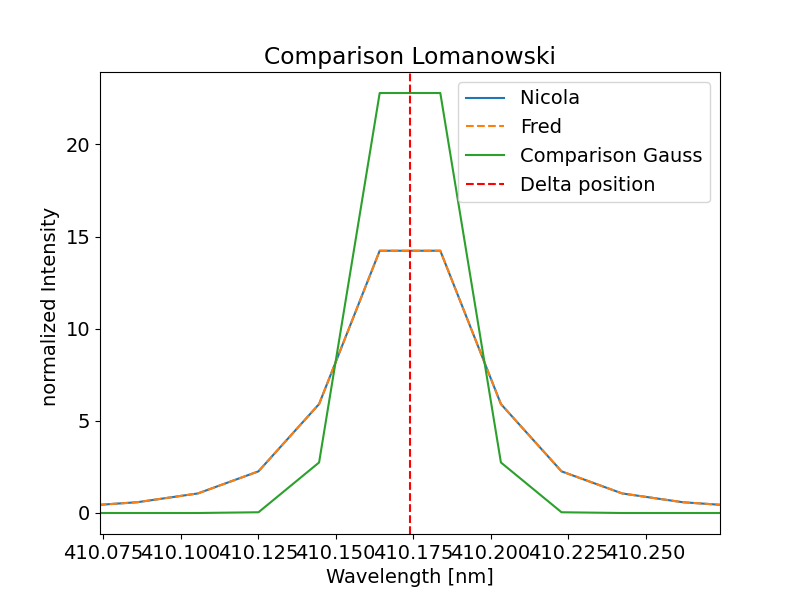

In [6]:
import matplotlib.pyplot as plt
import scipy
from scipy.constants import c
from divertor_spectroscopy import utilities as utils
from divertor_spectroscopy import atomic_data
from divertor_spectroscopy import spectrum
from divertor_spectroscopy import instrument
from divertor_spectroscopy import analysis
plt.rcParams.update({'font.size': 14})
dens_vec = 5e19
temp_vec = 1
wavelength = np.linspace(410.174-10,410.174+10,1024)
freqs = c/(wavelength*1e-9)
print(freqs)
spectrum_nicola =H_delta_lomanowski(dens_vec=dens_vec,temp_vec=temp_vec,freqs=freqs,Te=1)[:,0]
spectrum_nicola = spectrum_nicola/np.trapz(wavelength,spectrum_nicola)
coeff = atomic_data.get_lomanowski_conversion_coefficients(["H_delta"])
fwhm = coeff["H_delta"]["C"] * dens_vec**coeff["H_delta"]["a"] / temp_vec**coeff["H_delta"]["b"]
spectrum_fred = utils.lomanowski(x=wavelength,offset=0,position=410.174,intensity=1,fwhm=fwhm)
#spectrum_fred = analyse.build_spectrum(wavelength,*analyse.default_fit_parameters)         
spectrum_gauss = utils.gauss(x=wavelength, offset=0, position=410.174, intensity=1, width=doppler_width)

plt.figure(figsize=(8,6))
shift = 0
plt.plot(shift+wavelength,np.abs(spectrum_nicola),label="Nicola ")
plt.plot(wavelength,spectrum_fred,label="Fred",ls="--")
plt.plot(wavelength,spectrum_gauss,label="Comparison Gauss")
plt.axvline(410.174,ls="--",c="r",label="Delta position")
plt.xlim(410.174-0.1,410.174+0.1)
plt.title("Comparison Lomanowski")
plt.legend()
plt.xlabel("Wavelength [nm]")
plt.ylabel("normalized Intensity ")
plt.show()

### Test Doppler

[7.49155262e+14 7.49118665e+14 7.49082070e+14 ... 7.13562378e+14
 7.13529175e+14 7.13495975e+14]


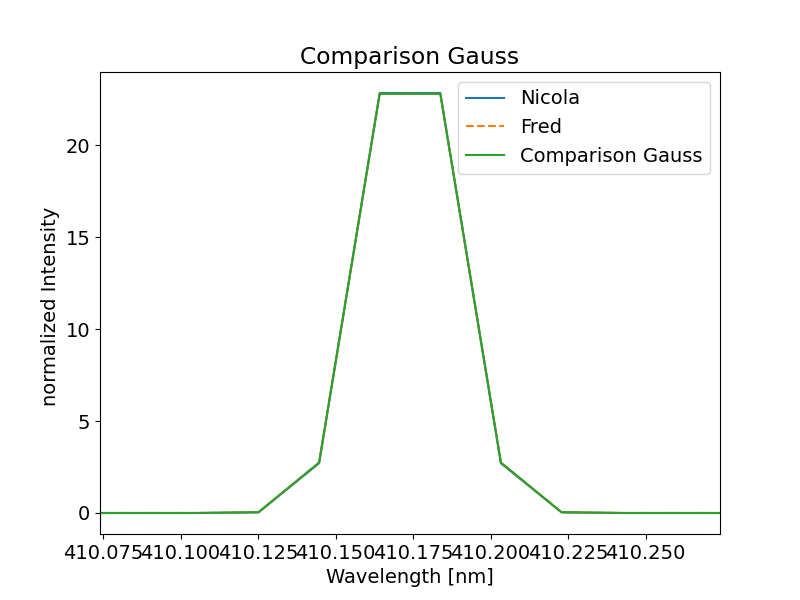

In [7]:
import matplotlib.pyplot as plt
import scipy
from scipy.constants import c
from divertor_spectroscopy import utilities as utils
from divertor_spectroscopy import atomic_data
from divertor_spectroscopy import spectrum
from divertor_spectroscopy import instrument
from divertor_spectroscopy import analysis
plt.rcParams.update({'font.size': 14})
dens_vec = 1e19
temp_vec = 1
wavelength = np.linspace(410.174-10,410.174+10,1024)
freqs = c/(wavelength*1e-9)
print(freqs)
spectrum_nicola =H_delta_doppler(dens_vec=dens_vec,temp_vec=temp_vec,freqs=freqs,Te=1)[:,0]
spectrum_nicola = spectrum_nicola/np.trapz(wavelength,spectrum_nicola)
coeff = atomic_data.get_lomanowski_conversion_coefficients(["H_delta"])
fwhm = coeff["H_delta"]["C"] * dens_vec**coeff["H_delta"]["a"] / temp_vec**coeff["H_delta"]["b"]
spectrum_fred = utils.gauss(x=wavelength,offset=0,position=410.174,intensity=1,width=doppler_width)
#spectrum_fred = analyse.build_spectrum(wavelength,*analyse.default_fit_parameters)         
spectrum_gauss = utils.gauss(x=wavelength, offset=0, position=410.174, intensity=1, width=doppler_width)

plt.figure(figsize=(8,6))
shift = 0
plt.plot(shift+wavelength,np.abs(spectrum_nicola),label="Nicola")
plt.plot(wavelength,spectrum_fred,label="Fred",ls="--")
plt.plot(wavelength,spectrum_gauss,label="Comparison Gauss")
plt.xlim(410.174-0.1,410.174+0.1)
plt.title("Comparison Gauss")
plt.legend()
plt.xlabel("Wavelength [nm]")
plt.ylabel("normalized Intensity ")
plt.show()

### I encountered a problem with the fitting of a lomanowski gauss, when there are nan in the spectrum. Also when the nans are far away from the spectrum
- tackle the problem

In [8]:
from divertor_spectroscopy.spectrum_models import ip320_cw_405_reduced_Balmer_delta
from divertor_spectroscopy import analysis
from divertor_spectroscopy import instrument

In [13]:
wavelength = np.linspace(395,415,1024)
instrument_function_mode = "gauss"
width = 0.04
zeeman=False
stark_density=True
inst = instrument.Instrument(wavelength=wavelength,instrument_function_mode=instrument_function_mode,width=width)
model = ip320_cw_405_reduced_Balmer_delta.Ip320_cw_405_reduced_Balmer_delta(zeeman=zeeman,stark_density=stark_density)
analyse = analysis.Analysis(model=model,instrument=inst)

2024-08-21 19:27:49,179 - divertor_spectroscopy.spectral_line_classes - DEBUG - Using Zeeman split lines


932
1024
932
['NIII', 'ArII', 'HI']


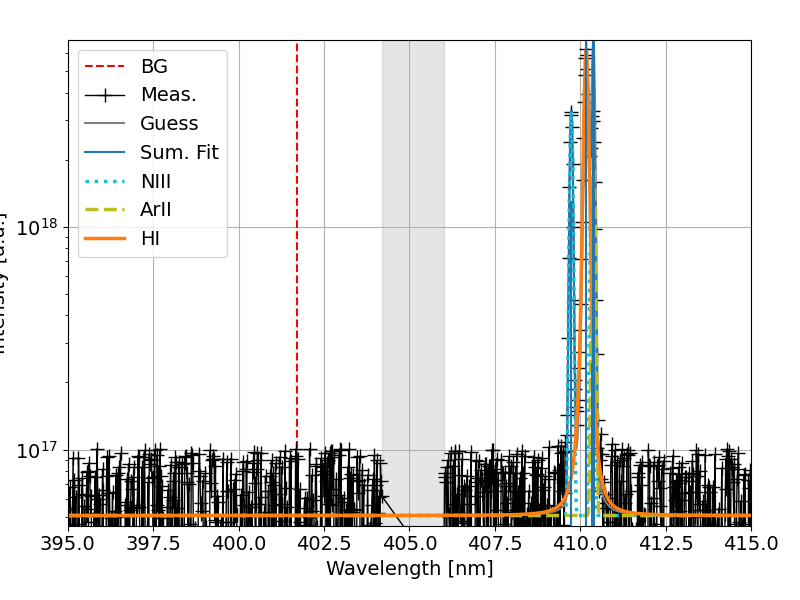

fit_description  fit_parameters  fit_parameters_linear      guess  \
0  Intensity_NIII_409.937       17.701351           5.027483e+17  17.684363   
1  Intensity_ArII_410.383       16.906315           8.059628e+16  17.470146   
2  Intensity_ArII_410.391       17.076819           1.193490e+17  17.470146   
3       Intensity_H_delta       18.001814           1.004186e+18  17.793391   
4   Stark_density_H_delta       20.008376           1.019475e+20  20.000000   

   lower_bounds  upper_bounds  
0      14.13222      19.79692  
1      14.13222      19.79692  
2      14.13222      19.79692  
3      15.13107      19.79692  
4      18.00000      21.00000

In [14]:
analyse.get_default_fit_parameters()
signal = analyse.build_spectrum(wavelength,*analyse.default_fit_parameters)
experiment_data=signal + np.array(np.random.rand(1024))*1e17 + 1e15
exclude_wavelength_from_fit = [404.2,406]

analyse.fit_spectrum(experiment_data=experiment_data,exclude_wavelength_from_fit=exclude_wavelength_from_fit)
highlight_tags = model.all_tags
print(highlight_tags)
#special_tags = ["NII 3s1P-3p1D","NII 3d3F-4f1G","NII 3d3F-4f3G"]
special_tags = []
scale = "log"
xlim = [409.5,410.5]
xlim = None
analyse.display_spectrum(experiment=True,guess=True,fit=True,show_positions=True,highlight_tags=highlight_tags,special_tags=special_tags,scale=scale,xlim=xlim)
analyse.format_fit_output()
display(analyse.fit_output)

### I want the fit to work, when the center is not included
- because of saturation
- or when it is exluded on purpose to use the flanks to fit

1020
1024
1020
['NIII', 'ArII', 'HI']


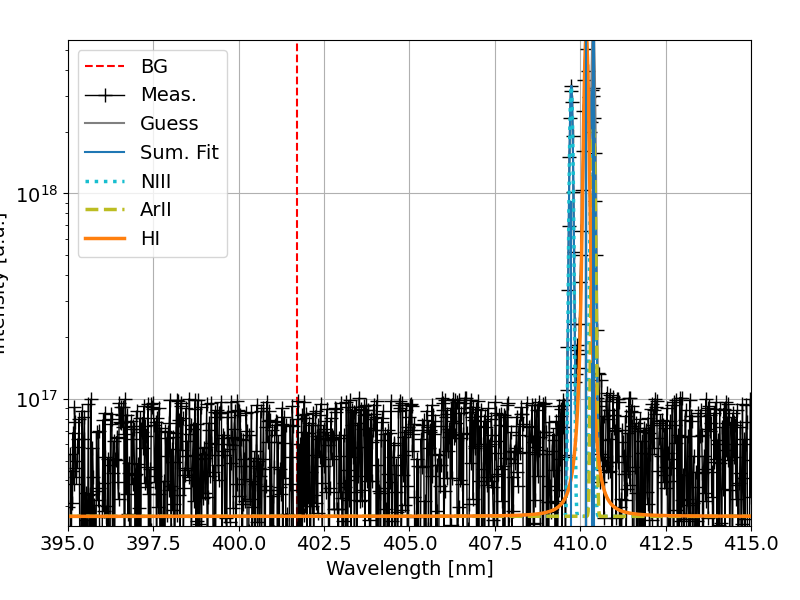

fit_description  fit_parameters  fit_parameters_linear      guess  \
0  Intensity_NIII_409.937       17.709969           5.128249e+17  17.695945   
1  Intensity_ArII_410.383       17.097841           1.252682e+17  17.470099   
2  Intensity_ArII_410.391       16.926794           8.448787e+16  17.470099   
3       Intensity_H_delta       17.930600           8.523140e+17  17.793663   
4   Stark_density_H_delta       19.857731           7.206604e+19  20.000000   

   lower_bounds  upper_bounds  
0     14.136666     19.795531  
1     14.136666     19.795531  
2     14.136666     19.795531  
3     15.135516     19.795531  
4     18.000000     21.000000

In [15]:
analyse.get_default_fit_parameters()
signal = analyse.build_spectrum(wavelength,*analyse.default_fit_parameters)
experiment_data=signal + np.array(np.random.rand(1024))*1e17 + 1e15
exclude_wavelength_from_fit = [410.133,410.213]

analyse.fit_spectrum(experiment_data=experiment_data,exclude_wavelength_from_fit=exclude_wavelength_from_fit)
highlight_tags = model.all_tags
print(highlight_tags)
#special_tags = ["NII 3s1P-3p1D","NII 3d3F-4f1G","NII 3d3F-4f3G"]
special_tags = []
scale = "log"
xlim = [409.5,410.5]
xlim = None
analyse.display_spectrum(experiment=True,guess=True,fit=True,show_positions=True,highlight_tags=highlight_tags,special_tags=special_tags,scale=scale,xlim=xlim)
analyse.format_fit_output()
display(analyse.fit_output)